In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
X=np.array([[1,0],
            [0,1]]) 

Y=np.array([[2,1],
            [1,2]]) 

Z=np.dot(X,Y) 
Z

array([[2, 1],
       [1, 2]])

In [6]:
Animals = ["lion", "giraffe", "gorilla", "parrots", "crocodile","deer", "swan"]
i = 0
new_list = []
while i < len(Animals)-1:
    if len(Animals[i]) == 7:
        new_list.append(Animals[i])
    i+=1
print(new_list)

['giraffe', 'gorilla', 'parrots']


In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.groupby("species")[["petal_width"]].sum()

,petal_width
species,
setosa,12.3
versicolor,66.3
virginica,101.3


In [5]:
d = {'batch': ['A','B','C','A','B','C'], 'var1':[10,23,33,22,11,99],'var2':[100,253,333,262,111,969]}
df = pd.DataFrame(data=d)
df

,batch,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [6]:
df.groupby('batch').aggregate([np.min,np.median,np.max])

/tmp/ipykernel_19098/786768124.py:1: FutureWarning: The provided callable <function min at 0x7f948a9b8ae0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('batch').aggregate([np.min,np.median,np.max])
/tmp/ipykernel_19098/786768124.py:1: FutureWarning: The provided callable <function median at 0x7f94893ca7a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('batch').aggregate([np.min,np.median,np.max])
/tmp/ipykernel_19098/786768124.py:1: FutureWarning: The provided callable <function max at 0x7f948a9b89a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('batch').aggregate([np.min,np

var1            var2            
       min median max  min median  max
batch                                 
A       10   16.0  22  100  181.0  262
B       11   17.0  23  111  182.0  253
C       33   66.0  99  333  651.0  969

In [7]:
df.groupby('batch').transform(lambda x: x.mean())

,var1,var2
0,16.0,181.0
1,17.0,182.0
2,66.0,651.0
3,16.0,181.0
4,17.0,182.0
5,66.0,651.0


In [8]:
df.groupby("batch").filter(lambda x: x["var1"].mean()<17)

,batch,var1,var2
0,A,10,100
3,A,22,262


In [12]:
df[['var1','var2']].apply(np.sum)

var1     198
var2    2028
dtype: int64

In [21]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df.pivot_table(values='age',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [24]:
d={"A":["foo","foo","foo","bar","bar","bar"],
    "B":["one","one","two","two","one","one"],
    "C":["x","y","x","y","x","y"],
    "D":[1,3,2,5,4,1]}
new_df = pd.DataFrame(d)
new_df

,A,B,C,D
0,foo,one,x,1
1,foo,one,y,3
2,foo,two,x,2
3,bar,two,y,5
4,bar,one,x,4
5,bar,one,y,1


In [31]:
new_df.groupby(["A","B","C"])[["D"]].aggregate("mean")

D
A   B   C     
bar one x  4.0
        y  1.0
    two y  5.0
foo one x  1.0
        y  3.0
    two x  2.0

In [29]:
new_df.groupby(["A","B","C"])[["D"]].aggregate("mean").stack()

A    B    C   
bar  one  x  D    4.0
          y  D    1.0
     two  y  D    5.0
foo  one  x  D    1.0
          y  D    3.0
     two  x  D    2.0
dtype: float64

In [30]:
new_df.groupby(["A","B","C"])[["D"]].aggregate("mean").unstack()

D     
C          x    y
A   B            
bar one  4.0  1.0
    two  NaN  5.0
foo one  1.0  3.0
    two  2.0  NaN

In [35]:
new_df.groupby(["A","B","C"])[["D"]].aggregate("mean").unstack().unstack()

D               
C      x         y     
B    one  two  one  two
A                      
bar  4.0  NaN  1.0  5.0
foo  1.0  2.0  3.0  NaN

In [38]:
d = {"var1":[1,2,3,4,5],
     "var2":[111,222,333,444,555]}
df = pd.DataFrame(d)
df

,var1,var2
0,1,111
1,2,222
2,3,333
3,4,444
4,5,555


In [41]:
df[["var1"]].mean()

var1    3.0
dtype: float64

In [42]:
df.apply(np.mean)

var1      3.0
var2    333.0
dtype: float64

In [44]:
df.map(lambda x:x*5)

,var1,var2
0,5,555
1,10,1110
2,15,1665
3,20,2220
4,25,2775


In [46]:
df.var1.map({1:"Z",3:"A"})

0      Z
1    NaN
2      A
3    NaN
4    NaN
Name: var1, dtype: object

In [48]:
df.isnull().sum()

var1    0
var2    0
dtype: int64

In [53]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [50]:
df.isnull().sum()

carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64

In [54]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [4]:
import pandas as pd

# Sample DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}
df = pd.DataFrame(data)




In [5]:
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [7]:
df['A'][0]

1

In [3]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [7]:
drinks.beer_servings.mean()

106.16062176165804

In [8]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [10]:
drinks[drinks.continent == 'Africa'].beer_servings.mean()

61.471698113207545

In [22]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [34]:
numeric_columns = drinks.select_dtypes(include='number').columns
drinks.groupby('continent')[numeric_columns].sum()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,3258,866,862,159.4
Asia,1630,2677,399,95.5
Europe,8720,5965,6400,387.8
North America,3345,3812,564,137.9
Oceania,1435,935,570,54.1
South America,2101,1377,749,75.7


In [19]:
%matplotlib inline

<Axes: xlabel='continent'>

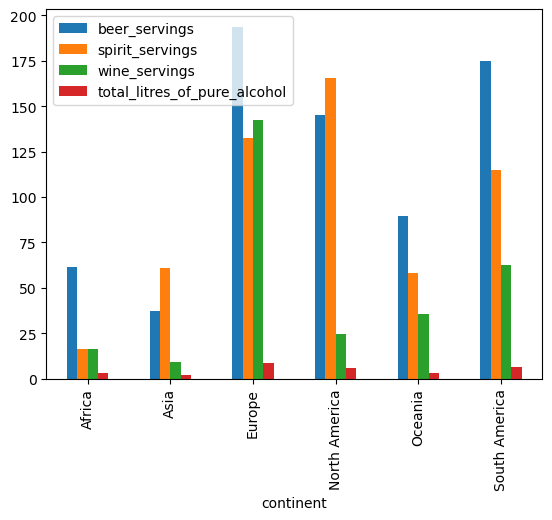

In [20]:
drinks.groupby('continent')[numeric_columns].mean().plot(kind='bar')

In [33]:
drinks.groupby('continent')[numeric_columns].transform(lambda x:x.sum())

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,1630.0,2677.0,399.0,95.5
1,8720.0,5965.0,6400.0,387.8
2,3258.0,866.0,862.0,159.4
3,8720.0,5965.0,6400.0,387.8
4,3258.0,866.0,862.0,159.4
...,...,...,...,...
188,2101.0,1377.0,749.0,75.7
189,1630.0,2677.0,399.0,95.5
190,1630.0,2677.0,399.0,95.5
191,3258.0,866.0,862.0,159.4


In [35]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [41]:
drinks.pivot_table(columns='continent',index='country', margins=True)

beer_servings                                                 \
continent          Africa        Asia      Europe North America  Oceania   
country                                                                    
Afghanistan           NaN    0.000000         NaN           NaN      NaN   
Albania               NaN         NaN   89.000000           NaN      NaN   
Algeria         25.000000         NaN         NaN           NaN      NaN   
Andorra               NaN         NaN  245.000000           NaN      NaN   
Angola         217.000000         NaN         NaN           NaN      NaN   
...                   ...         ...         ...           ...      ...   
Vietnam               NaN  111.000000         NaN           NaN      NaN   
Yemen                 NaN    6.000000         NaN           NaN      NaN   
Zambia          32.000000         NaN         NaN           NaN      NaN   
Zimbabwe        64.000000         NaN         NaN           NaN      NaN   
All             61.471698   37.045455  193.777778    145.434783  89.6875   

                                      spirit_servings                         \
continent   South America         All          Africa       Asia      Europe   
country                                                                        
Afghanistan           NaN    0.000000             NaN   0.000000         NaN   
Albania               NaN   89.000000             NaN        NaN  132.000000   
Algeria               NaN   25.000000        0.000000        NaN         NaN   
Andorra               NaN  245.000000             NaN        NaN  138.000000   
Angola                NaN  217.000000       57.000000        NaN         NaN   
...                   ...         ...             ...        ...         ...   
Vietnam               NaN  111.000000             NaN   2.000000         NaN   
Yemen                 NaN    6.000000             NaN   0.000000         NaN   
Zambia                NaN   32.000000       19.000000        NaN         NaN   
Zimbabwe              NaN   64.000000       18.000000        NaN         NaN   
All            175.083333  106.160622       16.339623  60.840909  132.555556   

             ... total_litres_of_pure_alcohol                           \
continent    ...                      Oceania South America        All   
country      ...                                                         
Afghanistan  ...                          NaN           NaN   0.000000   
Albania      ...                          NaN           NaN   4.900000   
Algeria      ...                          NaN           NaN   0.700000   
Andorra      ...                          NaN           NaN  12.400000   
Angola       ...                          NaN           NaN   5.900000   
...          ...                          ...           ...        ...   
Vietnam      ...                          NaN           NaN   2.000000   
Yemen        ...                          NaN           NaN   0.100000   
Zambia       ...                          NaN           NaN   2.500000   
Zimbabwe     ...                          NaN           NaN   4.700000   
All          ...                      3.38125      6.308333   4.717098   

            wine_servings                                              \
continent          Africa      Asia      Europe North America Oceania   
country                                                                 
Afghanistan           NaN  0.000000         NaN           NaN     NaN   
Albania               NaN       NaN   54.000000           NaN     NaN   
Algeria         14.000000       NaN         NaN           NaN     NaN   
Andorra               NaN       NaN  312.000000           NaN     NaN   
Angola          45.000000       NaN         NaN           NaN     NaN   
...                   ...       ...         ...           ...     ...   
Vietnam               NaN  1.000000         NaN           NaN     NaN   
Yemen                 NaN  0.000000         NaN           N

In [42]:
# Sample DataFrame
data = {'A': [1, 2, 3, 4], 'B': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Apply a lambda function to add columns A and B
df['sum'] = df.apply(lambda row: row['A'] + row['B'], axis=1)
print(df)

   A   B  sum
0  1  10   11
1  2  20   22
2  3  30   33
3  4  40   44


In [45]:
df.loc['sum'] = df.apply(lambda col: col.sum(), axis=0)
df

,A,B,sum
0,1,10,11
1,2,20,22
2,3,30,33
3,4,40,44
sum,20,200,220


In [48]:
# Sample Series
data = pd.Series([1, 2, 3, 4, 5])

# Filter even numbers using a lambda function
filtered_data = data[data.apply(lambda x: x % 2 == 0)]
print(filtered_data)

1    2
3    4
dtype: int64


In [57]:
# Sample DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Group by 'Category' and apply a lambda function to calculate mean of 'Value'
mean_by_category = df.groupby('Category')['Value'].apply(lambda x:x**2)
print(mean_by_category)

Category   
A         0     100
          2     900
          4    2500
B         1     400
          3    1600
Name: Value, dtype: int64


In [50]:
mean_by_category = df.groupby('Category')['Value'].mean()
print(mean_by_category)

Category
A    30.0
B    30.0
Name: Value, dtype: float64


In [1]:
r = lambda x:x+15
r(10)

25

In [2]:
l = lambda x,y:x*y
l(10,20)

200

In [3]:
def func_compute(n):
    return lambda x: x * n

double = func_compute(2)
double(15)

30

In [1]:
# Create a list of dictionaries named 'models', each dictionary representing a mobile phone model with 'make', 'model', and 'color' keys
models = [
    {'make': 'Nokia', 'model': 216, 'color': 'Black'},
    {'make': 'Mi Max', 'model': '2', 'color': 'Gold'},
    {'make': 'Samsung', 'model': 7, 'color': 'Blue'}
]

# Display a message indicating that the following output will show the original list of dictionaries
print("Original list of dictionaries:")
print(models)

# Sort the list of dictionaries ('models') based on the value associated with the 'color' key in each dictionary
# Uses the 'sorted()' function with a lambda function as the sorting key to sort based on the 'color' value
sorted_models = sorted(models, key=lambda x: x['color'])

# Display a message indicating that the following output will show the sorted list of dictionaries
print("\nSorting the List of dictionaries:")
print(sorted_models) 

Original list of dictionaries:
[{'make': 'Nokia', 'model': 216, 'color': 'Black'}, {'make': 'Mi Max', 'model': '2', 'color': 'Gold'}, {'make': 'Samsung', 'model': 7, 'color': 'Blue'}]

Sorting the List of dictionaries:
[{'make': 'Nokia', 'model': 216, 'color': 'Black'}, {'make': 'Samsung', 'model': 7, 'color': 'Blue'}, {'make': 'Mi Max', 'model': '2', 'color': 'Gold'}]


In [5]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [16]:
drinks[['country','continent']].map(lambda x:x.upper())

,country,continent
0,AFGHANISTAN,ASIA
1,ALBANIA,EUROPE
2,ALGERIA,AFRICA
3,ANDORRA,EUROPE
4,ANGOLA,AFRICA
...,...,...
188,VENEZUELA,SOUTH AMERICA
189,VIETNAM,ASIA
190,YEMEN,ASIA
191,ZAMBIA,AFRICA


In [26]:
drinks['country'].map(lambda x:x.upper() if x=='Afghanistan' else x)

0      AFGHANISTAN
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [27]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df = pd.DataFrame(data)
df


,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [29]:
df.pivot(index="gender", columns="sport", values="age")

sport,basketball,football,tennis,voleyball
gender,,,,
female,26.0,NaN,24.0,22.0
male,21.0,23.0,20.0,NaN


In [30]:
df.pivot(index="gender", columns="sport", values=["age","height"])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                  
sport  voleyball  
gender            
female     182.0  
male         NaN

In [36]:
df.pivot_table(index="gender", columns="sport", values="status")

TypeError: agg function failed [how->mean,dtype->object]

In [41]:
df.loc[2,'sport'] = "tennis"
df


,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [42]:
df.pivot(index="gender", columns="sport", values="age")

ValueError: Index contains duplicate entries, cannot reshape

In [43]:
df.pivot_table(index="gender", columns="sport", values="age")

sport,basketball,football,tennis,voleyball
gender,,,,
female,NaN,NaN,25.0,22.0
male,21.0,23.0,20.0,NaN


In [45]:
df.pivot_table(index="gender", columns="sport", values="age",aggfunc="sum")

sport,basketball,football,tennis,voleyball
gender,,,,
female,NaN,NaN,50.0,22.0
male,21.0,23.0,20.0,NaN


In [2]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df0 = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df0

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [3]:
df = df0.copy()
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 748.0+ bytes


In [4]:
df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [10]:
df["gender"].replace({'M':1,'F':0})

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [11]:
df["gender"].apply(lambda x: 1 if x =='M' else 0)

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [12]:
df["gender"].apply(lambda x: x.lower() if x =='M' else 0)

0     m
1     0
2     m
3     0
4     m
5     0
6     m
7     0
8     m
9     0
10    m
Name: gender, dtype: object

In [17]:
for x in ["a", "b", "c"]:
    a = x.upper()
    continue
    print(x)
print(a)

C


In [27]:
import random
n = 0
favorite = 7
while n < 100:
    n += 1
    draw = random.randint(1, 49) # e.g. German lottery
    if draw == favorite:
        print("Got my number! :)")
        break
else:
    print("My favorite did not show up! :(")
print(f"I tried {n} times!")
## Got my number! :)
## I tried 10 times!

Got my number! :)
I tried 58 times!


In [35]:
import pandas as pd

# Create a DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df_original = pd.DataFrame(data)

# Shallow copy using copy()
df_shallow_copy = df_original.copy()

# Modify data in the shallow copied DataFrame
df_shallow_copy['A'][0] = 100

print(df_original)
print(df_shallow_copy)


   A  B
0  1  4
1  2  5
2  3  6
     A  B
0  100  4
1    2  5
2    3  6


In [36]:
import pandas as pd

# Create a DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df_original = pd.DataFrame(data)

# Deep copy using copy(deep=True)
df_deep_copy = df_original.copy(deep=True)

# Modify data in the deep copied DataFrame
df_deep_copy['A'][0] = 100

print(df_original)


   A  B
0  1  4
1  2  5
2  3  6


In [41]:
class Rectangle:
    width = 0
    height = 0
    
    def __init__(self, width, height):
        self.width = width
        self.height = height
    
    def area(self):
        return self.width * self.height
    def perimeter(self):
        return 2 * (self.width + self.height)
myrectangle = Rectangle(10,20)
myrectangle.area()
myrectangle.perimeter()


60

In [42]:
x = -3
if x < 0:
    raise Exception("Sorry, ’x’ is lower than 0.")

Exception: Sorry, ’x’ is lower than 0.

In [45]:
try:
    print(10 / ppp)
except ZeroDivisionError:
    print("Zero division")
except NameError:
    print("Variable ’ppp’ is not defined")

Variable ’ppp’ is not defined


In [47]:
def gen_multiplier(a):
    def fun(x):
        return a * x
    return fun
multi1 = gen_multiplier(4)
multi2 = gen_multiplier(5)
print(multi1,"  ",multi2)
multi1("EH")
multi2("EH")

<function gen_multiplier.<locals>.fun at 0x7b9497324f40>    <function gen_multiplier.<locals>.fun at 0x7b94973256c0>


'EHEHEHEHEH'